<a href="https://colab.research.google.com/github/Mdrashid11/machine-learning/blob/main/multilinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score # Import the necessary functions

In [3]:

import pandas as pd
data = pd.read_csv("realest.csv")
print(data.head())

   Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0   53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1   55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2   56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3   58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4   64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0


In [5]:
# Define features and target variable
X = data.drop(columns='Price')  # Features
y = data['Price']               # Target variable

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
imputer = SimpleImputer(strategy='mean')  # Create an imputer with 'mean' strategy
X_train = imputer.fit_transform(X_train)  # Fit and transform on X_train
X_test = imputer.transform(X_test)

In [15]:
# 6. Impute missing values in the target variable (if any)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
y_train = imputer.fit_transform(y_train)
y_test = imputer.transform(y_test)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [16]:
# Create and train the multiple linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the test set
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear


(86.79510336822887, 0.5504209282668678)

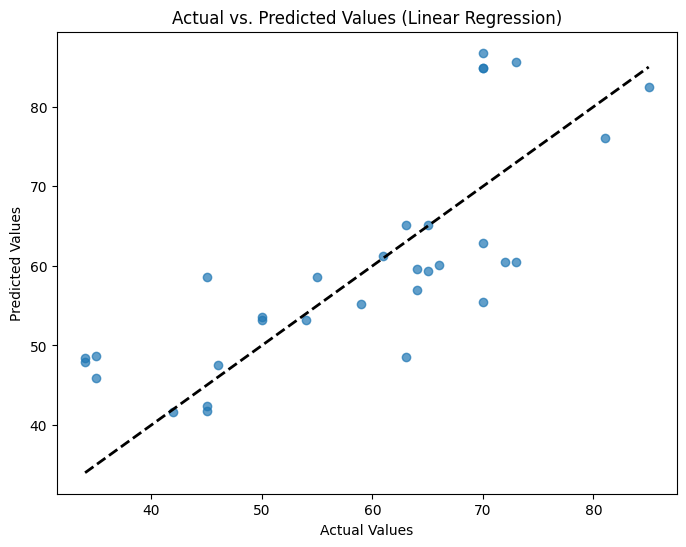

In [25]:
# 1. Scatter plot of actual vs. predicted values:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.show()

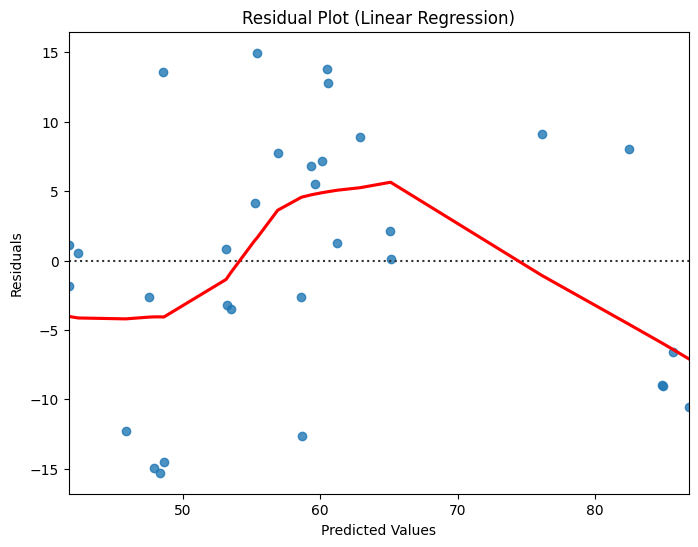

In [26]:
# 2. Residual plot:
residuals = y_test - y_pred_linear
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_linear, y=residuals, lowess=True, line_kws={'color': 'red'})  # lowess: Locally Weighted Scatterplot Smoothing
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()


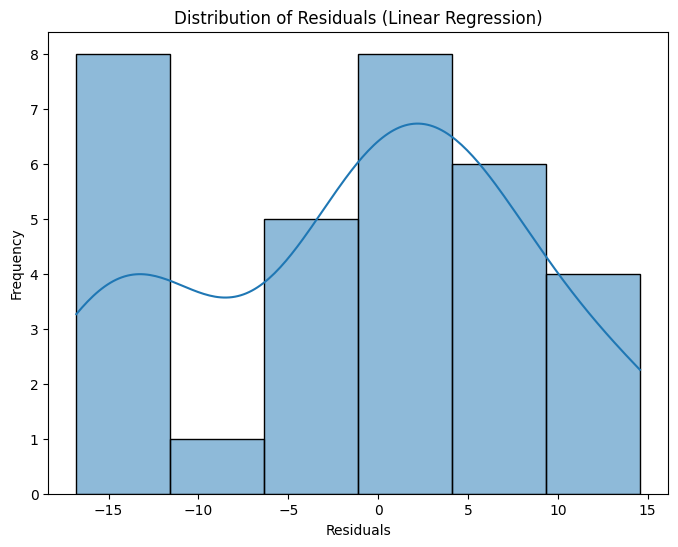

In [27]:
# 3. Distribution of residuals:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)  # kde: Kernel Density Estimation
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Linear Regression)")
plt.show()